In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
import numpy as np
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline
import os
from tensorflow.keras.optimizers import Adam

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!unzip -q "/content/drive/My Drive/plane.zip" -d /content/planes

In [0]:
TRAIN_PATH = '/content/planes'

BATCH_SIZE = 50

IMG_WIDTH = 96
IMG_HEIGHT = 54


In [0]:
data_gen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=5,
    width_shift_range=0.05,
    height_shift_range=0.05,
    zoom_range=0.05,
    horizontal_flip=False,
    fill_mode='nearest',
    validation_split=0.1
)


In [9]:
train_generator = data_gen.flow_from_directory(
    TRAIN_PATH,
    target_size=[IMG_WIDTH, IMG_HEIGHT],
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True,
    subset='training'
)


Found 1859 images belonging to 3 classes.


In [10]:
validation_generator = data_gen.flow_from_directory(
    TRAIN_PATH,
    target_size=[IMG_WIDTH, IMG_HEIGHT],
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True,
    subset='validation'
)

Found 206 images belonging to 3 classes.


In [11]:
train_generator.class_indices

{'boeing_737': 0, 'boeing_747': 1, 'ан_24': 2}

In [12]:
boeing_737_tree = os.listdir('{}/boeing_737'.format(TRAIN_PATH))
for i in range(4):
    print(boeing_737_tree[i])
type(boeing_737_tree)

216ba54155.jpg
6cba537f9b.jpg
f2abc919ce.jpg
c2f594aef9.jpg


list

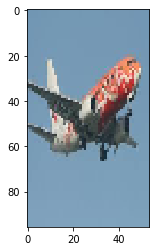

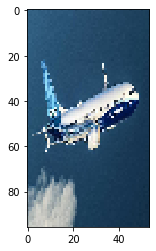

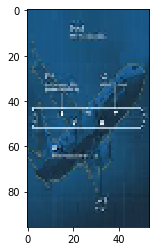

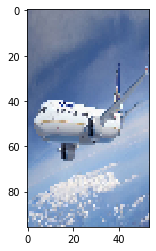

In [13]:
step = 0
for i in range(4):
    img_path = "{}/boeing_737/{}".format(TRAIN_PATH, boeing_737_tree[i])
    plt.imshow(image.load_img(img_path, target_size=(IMG_WIDTH, IMG_HEIGHT)))
    plt.show()

In [14]:
model = Sequential()
model.add(Conv2D(512, (5, 5), padding='same', activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Conv2D(512, (7, 7), padding='same', activation='linear'))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.2))

model.add(Conv2D(512, (5, 5), padding='same', activation='linear'))#tut
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512, activation='linear'))
model.add(Dense(512, activation='relu'))

model.add(Dense(len(train_generator.class_indices), activation='softmax'))

model.compile(loss='kullback_leibler_divergence', optimizer=Adam(lr=0.0001), metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    epochs=30,
    verbose=1
)

Epoch 1/30
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
36/37 [============================>.] - ETA: 1:37 - loss: 1.1037 - acc: 0.3428